# Data Visualization
___

If our models aren't doing better than the baseline, then perhaps the available data visualized may provide insight.  Please see the SpaCy notebook for word visualizations on the probable_cause column.

In [214]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator

In [3]:
airline_df = pd.read_csv('./data/text_processed_aviation_data.csv')

In [4]:
airline_df.head()

,event_type,event_date,tail_number,highest_injury_level,fatal_injury_count,serious_injury_count,minor_injury_count,probable_cause,latitude,longitude,airport_id,operator,make,aircraft_damage,model
0,INC,2023-11-30,N494HA,minor,0,0,1,reportunavailable,20.899501,-156.429730,OGG,hawaiian,boeing,Minor,717
1,ACC,2023-09-30,N37560,none,0,0,0,reportunavailable,39.849312,-104.673820,DEN,united,boeing,Substantial,737
2,ACC,2023-08-21,N516AS,none,0,0,0,reportunavailable,33.675701,-117.867990,SNA,alaska,boeing,Substantial,737
3,INC,2023-08-11,"N7734H, N564HV",none,0,0,0,reportunavailable,32.730189,-117.175620,SAN,southwest,boeing,no_damage,737
4,INC,2023-08-03,N649JB,none,0,0,0,reportunavailable,30.486167,-81.750781,JAX,jetblue,airbus,no_damage,A320


In [73]:
# I want the sum of fatalities per airline
fatalities_per_operator = pd.DataFrame(airline_df.groupby('operator')['fatal_injury_count'].sum().reset_index())

#I added this because there were a handful of airlines that didn't have any fatalities and it make the chart look
# skewed.
fatalities_per_operator = fatalities_per_operator[fatalities_per_operator['fatal_injury_count'] > 0]

In [75]:
fatalities_per_operator = fatalities_per_operator.sort_values(by = 'fatal_injury_count', ascending = False)

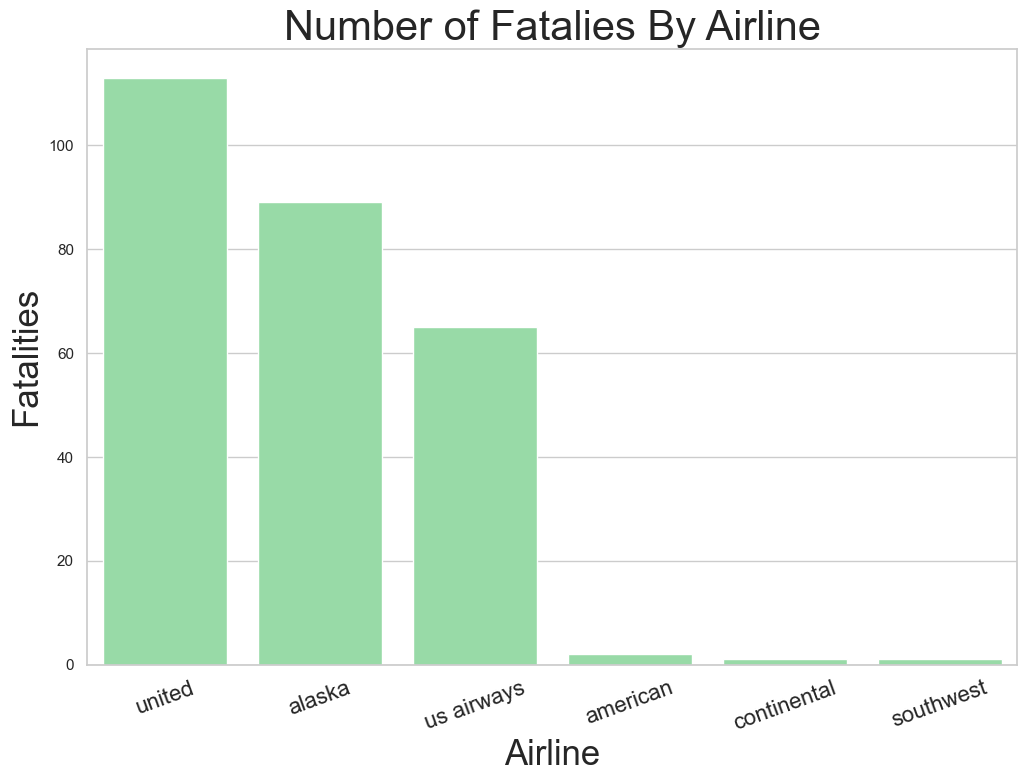

In [96]:
# Plot Settings
plt.figure(figsize = (12, 8))
sns.set_theme(style="whitegrid")
plt.tight_layout()

sns.set_color_codes("pastel")
sns.barplot(data = fatalities_per_operator,
            x = 'operator',
            y = 'fatal_injury_count',
           color = 'g')

# Plot Labels
plt.title('Number of Fatalies By Airline', size = 30)

plt.xlabel('Airline', size = 25)
plt.xticks(size = 16, rotation = 20)
plt.ylabel('Fatalities', size = 25)

#Save and export
plt.savefig('../airline_safety/plot_images/number_fatalities_by_airline.png', dpi = 192);

In [233]:
#Separate dataframe by accident and incident.  Need to make copies to prevent error warnings
accidents_only = airline_df[airline_df['event_type'] == 'ACC'].copy()
incidents_only = airline_df[airline_df['event_type'] == 'INC'].copy()

In [234]:
accidents_only['event_date'] = pd.to_datetime(accidents_only['event_date'])
incidents_only['event_date'] = pd.to_datetime(incidents_only['event_date'])

In [235]:
accidents_only['year'] = accidents_only['event_date'].dt.year
incidents_only['year'] = incidents_only['event_date'].dt.year

This was a challenge to get the kind of dataframe I wanted.  Count of accidents per year. I referenced [this](https://stackoverflow.com/questions/72916328/pandas-groupby-newbie-conundrum) article because I knew I wanted to group them together somehow. The unstack [documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.unstack.html) was also referenced. Also referenced ChatGPT for help with grouping. Size counts the number of instances in an array.  The output is a series, so .unstack() transforms it into a dataframe with the calculated values as a column.

In [236]:
accidents_by_year = accidents_only.groupby(['year', 'event_type']).size().unstack(fill_value=0)
incidents_by_year = incidents_only.groupby(['year', 'event_type']).size().unstack(fill_value=0)

In [237]:
#Finally
accidents_by_year.head(), incidents_by_year.head()

(event_type  ACC
 year           
 1982          4
 1983          1
 1984          1
 1985          1
 1986          6,
 event_type  INC
 year           
 1982          5
 1983          7
 1984          3
 1985          4
 1986          3)

Referenced [this](https://stackoverflow.com/questions/12050393/how-to-force-the-y-axis-to-only-use-integers) so that we could get only integers for the y-axis.

<Figure size 1200x800 with 0 Axes>

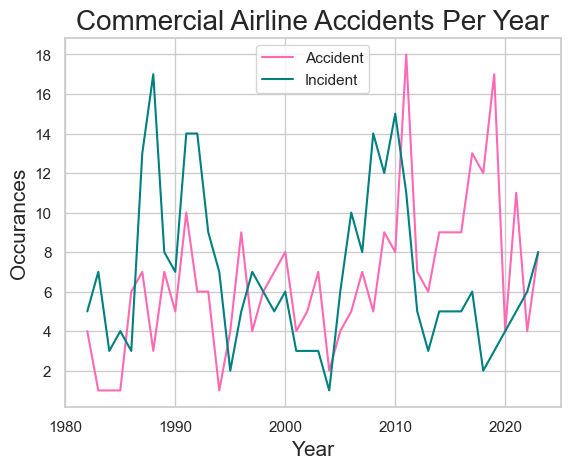

In [249]:
# Plot Settings
plt.figure(figsize = (12, 8))
sns.set_theme(style="whitegrid")
plt.tight_layout()

ax = plt.figure().gca()
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

#Plot
sns.lineplot(data = accidents_by_year, 
             x = 'year',
             y = 'ACC',
            color = 'hotpink',
            label = 'Accident')

sns.lineplot(data = incidents_by_year, 
             x = 'year',
             y = 'INC',
            color = 'teal',
            label = 'Incident')

# Titles and axis
plt.title('Commercial Airline Accidents Per Year', size = 20)
plt.ylabel('Occurances', size = 15)
plt.xlabel('Year', size = 15)

plt.legend()

plt.savefig('../airline_safety/plot_images/acc_and_inc_per_year.png', dpi = 192);